<a href="https://colab.research.google.com/github/j23-cs167/project-2-simbhagat/blob/main/Project2_bhagat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Simran Bhagat

Proposed Points (out of 25):

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

Using this [dataset](https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set) from the UCI Machine Learning Repository, I want to see how accurately machine learning techniques can classify each mother's predicted risk intensity level (target variable), given their age, systolic and diastolic blood pressures, blood sugar, and heart rate (predictor variables). I also want to understand if the techniques correctly or incorrectly classify mothers' risk levels through a confusion matrix, and see which factor has the most impact on the target variable.

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

In [1]:
# load and prepare your data here
from google.colab import drive
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/CS167Datasets/maternalhealthrisk.csv')
data.head()

Mounted at /content/drive


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [6]:
data.isna().any()
# there are no duplicates and the data doesn't have any structural issues, so it is clean

Age            False
SystolicBP     False
DiastolicBP    False
BS             False
BodyTemp       False
HeartRate      False
RiskLevel      False
dtype: bool

# 3. Research

Put your code and your experiments here.

In [2]:
# create training and test data sets
predictors = data.columns.drop('RiskLevel')
target = 'RiskLevel'

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=110)

In [3]:
# normalize data here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)
train_data_norm

array([[ 0.35207657,  0.39281091, -1.19266865, -0.55592705, -0.48713968,
        -0.54163208],
       [ 0.35207657, -1.2595213 , -0.82777719, -0.55592705, -0.48713968,
         0.06710353],
       [-0.161738  ,  0.39281091,  0.99668009, -0.55592705, -0.48713968,
        -0.54163208],
       ...,
       [-1.11596506, -1.8102987 , -1.19266865, -0.52512303, -0.48713968,
         0.67583915],
       [ 0.05846824,  0.39281091, -1.19266865, -0.80235918, -0.48713968,
         0.18885065],
       [-0.08833592,  0.39281091, -0.46288573,  0.09095731, -0.48713968,
         0.67583915]])

accuracy:  0.8571428571428571
             Pred high risk  Pred low risk  Pred mid risk
T high risk              54              2              2
T low risk                2             66             12
T mid risk                3              8             54
accuracy (normalized):  0.8571428571428571
             Pred high risk  Pred low risk  Pred mid risk
T high risk              54              2              2
T low risk                2             66             12
T mid risk                3              8             54


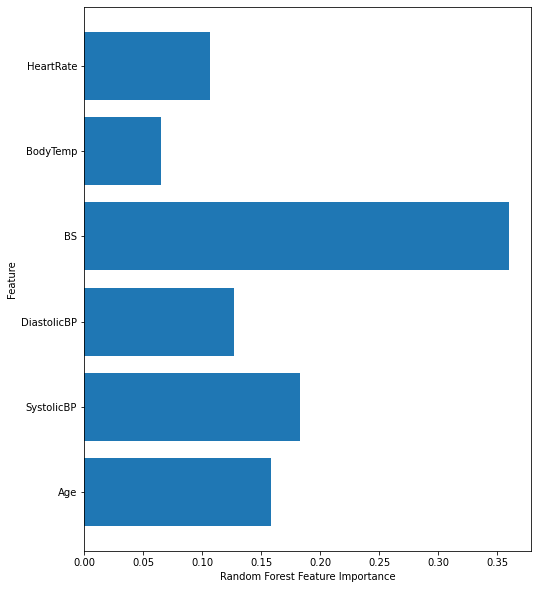

In [9]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# random forest model (non-normalized)
forest = RandomForestClassifier(random_state = 0, n_estimators=100)
forest.fit(train_data,train_sln)
predictions = forest.predict(test_data)
print('accuracy: ', metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique()
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

# random forest model (normalized)
nforest = RandomForestClassifier(random_state = 0, n_estimators=100)
nforest.fit(train_data_norm,train_sln)
preds = nforest.predict(test_data_norm)
print('accuracy (normalized): ', metrics.accuracy_score(test_sln, preds))
vals = data[target].unique()
conf_mat = metrics.confusion_matrix(test_sln, preds, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

# feature importance chart
import matplotlib.pyplot as plt
%matplotlib inline

index = range(len(predictors))

plt.figure(figsize=(8,10)) 
plt.barh(index,forest.feature_importances_,height=0.8) 
plt.ylabel('Feature')
plt.yticks(index,predictors) 
plt.xlabel("Random Forest Feature Importance")
plt.show()

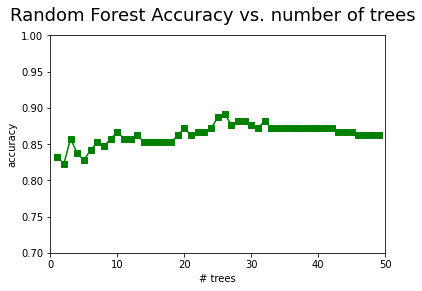

In [30]:
def tune_number_of_trees(n_estimator_values):
    rf_acc = []

    for n in n_estimator_values:

        curr_rf = RandomForestClassifier(n_estimators=n, random_state=41)
        curr_rf.fit(train_data_norm,train_sln)
        curr_predictions = curr_rf.predict(test_data_norm)
        curr_acc = metrics.accuracy_score(test_sln,curr_predictions)
        rf_acc.append(curr_acc)


    plt.suptitle('Random Forest Accuracy vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rf_acc,'gs-')
    plt.axis([0,n_estimator_values[-1]+1,0.7,1])
    plt.show()
    
tune_number_of_trees(range(1, 50))

In [24]:
# support vector classifier
from sklearn.svm import SVC

clf = SVC(kernel='poly', random_state=41)
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique()
conf_mat1 = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat1, index = "T " + vals, columns = "Pred " + vals))

# SVC (normalized)
nclf = SVC(kernel='poly', random_state=41)
nclf.fit(train_data_norm,train_sln)
preds = nclf.predict(test_data_norm)

print("accuracy (normalized):", metrics.accuracy_score(test_sln, preds))
vals = data[target].unique()
conf_mat2 = metrics.confusion_matrix(test_sln, preds, labels=vals)
print(pd.DataFrame(conf_mat2, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.7093596059113301
             Pred high risk  Pred low risk  Pred mid risk
T high risk              42              7              9
T low risk                0             74              6
T mid risk                6             31             28
accuracy (normalized): 0.6650246305418719
             Pred high risk  Pred low risk  Pred mid risk
T high risk              42             12              4
T low risk                1             75              4
T mid risk                4             43             18


In [20]:
# perceptron
from sklearn.linear_model import Perceptron

perc = Perceptron(penalty = 'l1', random_state=41)
perc.fit(train_data,train_sln)
perc_predictions = perc.predict(test_data)

print("accuracy:", metrics.accuracy_score(test_sln, perc_predictions))
conf_mat1 = metrics.confusion_matrix(test_sln, perc_predictions, labels=vals) 
print(pd.DataFrame(conf_mat1, index = "T" + vals, columns = "Pred" + vals))

# perceptron (normalized)
nperc = Perceptron(penalty = 'l1', random_state=41)
nperc.fit(train_data_norm,train_sln)
nperc_preds = nperc.predict(test_data_norm)

print("accuracy (normalized):", metrics.accuracy_score(test_sln, nperc_preds))
conf_mat2 = metrics.confusion_matrix(test_sln, nperc_preds, labels=vals) 
print(pd.DataFrame(conf_mat2, index = "T" + vals, columns = "Pred" + vals))

accuracy: 0.645320197044335
            Predhigh risk  Predlow risk  Predmid risk
Thigh risk             42            15             1
Tlow risk               4            75             1
Tmid risk               8            43            14
accuracy (normalized): 0.6305418719211823
            Predhigh risk  Predlow risk  Predmid risk
Thigh risk             52             3             3
Tlow risk               5            73             2
Tmid risk              20            42             3


In [15]:
# stochastic gradient descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='modified_huber', random_state=41)
sgd.fit(train_data,train_sln)
sgd_predictions = sgd.predict(test_data)

print("accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))
conf_mat1 = metrics.confusion_matrix(test_sln, sgd_predictions, labels=vals) 
print(pd.DataFrame(conf_mat1, index = "T " + vals, columns = "Pred " + vals))

# SGD (normalized)
nsgd = SGDClassifier(loss='modified_huber', random_state=41)
nsgd.fit(train_data_norm,train_sln)
nsgd_preds = nsgd.predict(test_data_norm)

print("accuracy (normalized):", metrics.accuracy_score(test_sln, nsgd_preds))
conf_mat2 = metrics.confusion_matrix(test_sln, nsgd_preds, labels=vals) 
print(pd.DataFrame(conf_mat2, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.5270935960591133
             Pred high risk  Pred low risk  Pred mid risk
T high risk              31              7             20
T low risk                0             35             45
T mid risk                6             18             41
accuracy (normalized): 0.6059113300492611
             Pred high risk  Pred low risk  Pred mid risk
T high risk              44              1             13
T low risk                8             53             19
T mid risk               16             23             26


In [14]:
# multilayer perceptron
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,), max_iter = 800)
mlp.fit(train_data,train_sln)
predictions = mlp.predict(test_data)

print("accuracy:", metrics.accuracy_score(test_sln, predictions))
conf_mat1 = metrics.confusion_matrix(test_sln, predictions, labels=vals) 
print(pd.DataFrame(conf_mat1, index = "T " + vals, columns = "Pred " + vals))

# MLP (normalized)
nmlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,), max_iter = 800)
nmlp.fit(train_data_norm,train_sln)
preds = nmlp.predict(test_data_norm)

print("accuracy (normalized):", metrics.accuracy_score(test_sln, preds))
conf_mat2 = metrics.confusion_matrix(test_sln, preds, labels=vals) 
print(pd.DataFrame(conf_mat2, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.5763546798029556
             Pred high risk  Pred low risk  Pred mid risk
T high risk              34             24              0
T low risk                0             80              0
T mid risk                5             57              3
accuracy (normalized): 0.7487684729064039
             Pred high risk  Pred low risk  Pred mid risk
T high risk              47              3              8
T low risk                1             74              5
T mid risk                5             29             31


In [19]:
# neural network model
import tensorflow as tf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import keras
from keras.models import Sequential
from keras.layers import Dense

model0 = Sequential(name='mhr_1')
model0.add(Dense(3, input_dim=6, activation='sigmoid'))
model0.add(Dense(3, activation='sigmoid'))
model0.add(Dense(3, activation='softmax'))

from sklearn.metrics import r2_score
model0.compile(loss='mean_squared_error',
              optimizer='sgd', 
              metrics=['accuracy'])
model0.summary()

Model: "mhr_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 3)                 21        
                                                                 
 dense_31 (Dense)            (None, 3)                 12        
                                                                 
 dense_32 (Dense)            (None, 3)                 12        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model0.fit(train_data, train_sln, batch_size=10, epochs=10)

Epoch 1/10


UnimplementedError: ignored

In [ ]:
# PCA on best model (random forest model)
from sklearn.decomposition import PCA
extractor = PCA(n_components=4, whiten=True)
extractor.fit(train_data)

train_transformed = extractor.transform(train_data)
test_transformed = extractor.transform(test_data)

forest = RandomForestClassifier(random_state = 0, n_estimators=100)
forest.fit(train_transformed,train_sln)
preds = forest.predict(test_transformed)

print("accuracy:", metrics.accuracy_score(test_sln, preds)) 
conf_mat = metrics.confusion_matrix(test_sln, preds, labels=vals) 
print(pd.DataFrame(conf_mat, index = "T" + vals, columns = "Pred" + vals))

accuracy: 0.8472906403940886
            Predhigh risk  Predlow risk  Predmid risk
Thigh risk             53             3             2
Tlow risk               4            63            13
Tmid risk               3             6            56


#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

Overall, the random forest model performed the best on this data as it yielded the highest accuracy. Through the feature importance chart, we are shown that blood sugar contributes the most to a mother's risk level out of all of the factors. For each model, I consulted www.scikit-learn.org to read through the documentation and adjust the inputs that would maximize the accuracy. When using the support vector classifier, perceptron, multi-layer perceptron, the normalized data performed better than the regular data because the consistency across the predictors increased model accuracy. The confusion matrices performed relatively well, as there were zero to few mothers who were predicted as "high risk" but were actually "low" or "mid" risk. There were some notable numbers where mothers who are "low risk" were predicted as "mid risk", and and mothers who are "mid risk" were predicted as "low risk", but I do not think those results adversely impact the conclusion. This classification is helpful in determining how much risk a pregnant mother has based on their health factors, and it has helped me understand the varying importance of the health factors in the risk classification.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

I worked on implementing a neural network model on this data; however, I had a "unimplemented error: graph execution error" keep appearing when I would fit the model to the training data. I read many posts on StackOverflow and Reddit, but was not able to resolve the issue. I also put the error into ([chatGPT](https://chat.openai.com/chat)), and it says the error is due to a using a different version of TensorFlow and to download a compatible version of TensorFlow. I could not find how to download other versions of TensorFlow, but if this model ran correctly, I would train the data on a large number of epochs to get the training accuracy to be very high while still increasing the test accuracy. I would then graph these training and test accuracies together to see how those metrics change as the epochs the model is run on increase.